In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from numpy.typing import NDArray
from statsmodels.regression.linear_model import RegressionResults

plt.rcParams["figure.figsize"] = [6, 5]

In [178]:
boston: pd.DataFrame
boston = sm.datasets.get_rdataset("Boston", package="MASS").data
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Prosta regresja liniowa
- dopasowanie modelu
- podsumowanie modelu
- obliczanie przykładowych statystyk
- przewidywanie
- wykres
- wykresy diagnostyczne

#### Dopasowanie modelu

In [179]:
fit_simple: RegressionResults
fit_simple = smf.ols("medv ~ lstat", data=boston).fit()

#### Podsumowanie modelu

In [180]:
fit_simple.params

Intercept    34.553841
lstat        -0.950049
dtype: float64

In [181]:
print(fit_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           5.08e-88
Time:                        01:17:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Przedziały ufności dla współczynników regresji

In [182]:
fit_simple.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


#### Obliczanie przykładowych statystyk

In [183]:
print("RSE = ", np.sqrt(fit_simple.mse_resid))
print("R_squared = ", fit_simple.rsquared)
print("Fstatistic = ", fit_simple.fvalue)

RSE =  6.215760405398068
R_squared =  0.5441462975864799
Fstatistic =  601.6178711098955


#### Przewidywanie

Przewidywanie średniej wartości.

In [184]:
predictions = fit_simple.get_prediction({"lstat": [5, 10, 15]})

pd.DataFrame(
    {
        "lstat": [5, 10, 15],
        "fit": predictions.predicted,
        "lwr": predictions.conf_int(obs=False)[:, 0],
        "upr": predictions.conf_int(obs=False)[:, 1],
    }
)

,lstat,fit,lwr,upr
0,5,29.803594,29.007412,30.599776
1,10,25.053347,24.474132,25.632563
2,15,20.303101,19.731588,20.874613


Przewidywanie przyszłej wartości.

In [185]:
pd.DataFrame(
    {
        "lstat": [5, 10, 15],
        "fit": predictions.predicted,
        "lwr": predictions.conf_int(obs=True)[:, 0],
        "upr": predictions.conf_int(obs=True)[:, 1],
    }
)

,lstat,fit,lwr,upr
0,5,29.803594,17.565675,42.041513
1,10,25.053347,12.827626,37.279068
2,15,20.303101,8.077742,32.528459


#### Wykres

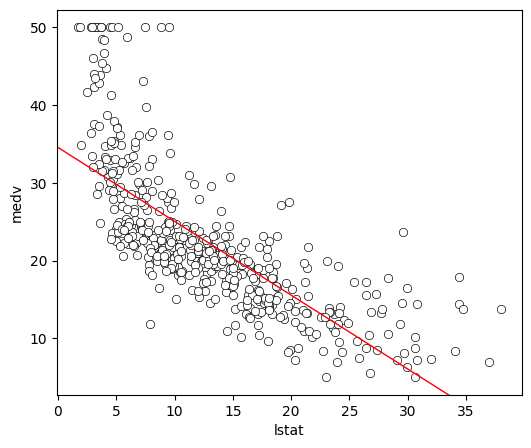

In [186]:
ax = sns.scatterplot(data=boston, x="lstat", y="medv", c="w", edgecolors="k")
_ = sm.graphics.abline_plot(model_results=fit_simple, ax=ax, c="r", lw=1.0)

#### Wykresy diagnostyczne

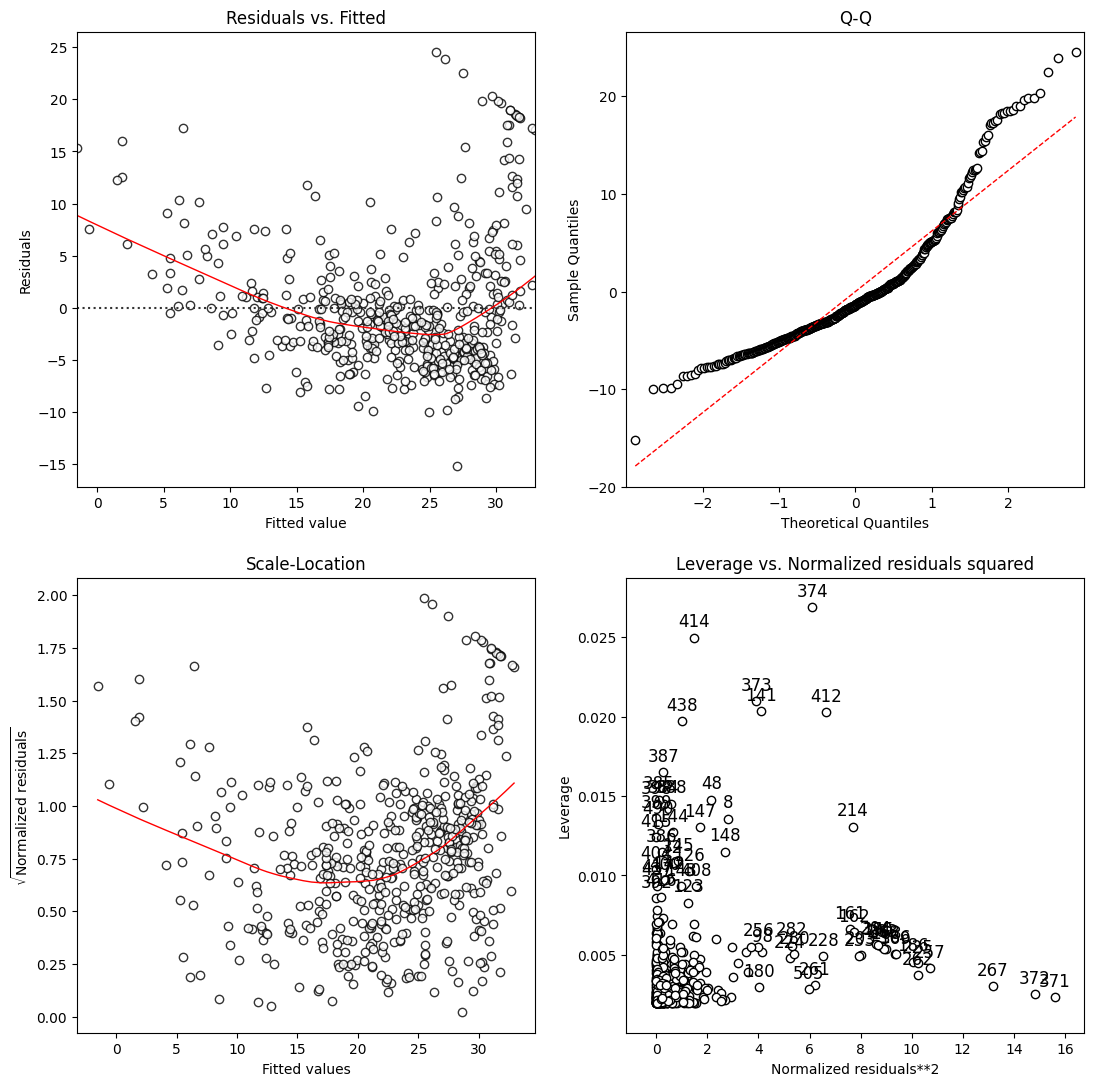

In [187]:
fig, ax = plt.subplots(2, 2, figsize=(13, 13))

_ = sns.residplot(
    x=fit_simple.fittedvalues,
    y=fit_simple.resid,
    lowess=True,
    ax=ax[0, 0],
    scatter_kws={"color": "w", "edgecolor": "k"},
    line_kws={"color": "r", "lw": 1.0},
)
_ = sns.regplot(
    x=fit_simple.fittedvalues,
    y=np.sqrt(np.abs(fit_simple.resid_pearson)),
    lowess=True,
    ax=ax[1, 0],
    scatter_kws={"color": "w", "edgecolor": "k"},
    line_kws={"color": "r", "lw": 1.0},
)
_ = sm.graphics.qqplot(fit_simple.resid, line="s", ax=ax[0, 1])
_ = sm.graphics.plot_leverage_resid2(fit_simple, ax=ax[1, 1], c="w")

# --- Make plots nicer
ax[0, 0].set_xlabel("Fitted value")
ax[0, 0].set_ylabel("Residuals")
ax[0, 0].set_title("Residuals vs. Fitted")

ax[1, 0].set_xlabel("Fitted values")
ax[1, 0].set_ylabel(r"$\sqrt{\text{Normalized residuals}}$")
ax[1, 0].set_title("Scale-Location")

ax[0, 1].set_title("Q-Q")
ax[0, 1].get_lines()[0].set_markerfacecolor("w")
ax[0, 1].get_lines()[0].set_markeredgecolor("k")
ax[0, 1].get_lines()[1].set(c="r", ls="--", lw=1.0)

ax[1, 1].get_lines()[0].set_markeredgecolor("k")

## Regresja wielokrotna
- dopasowanie modelu
- wszystkie zmienne
- inne kombinacje
- zbiór ufności dla dwóch współczynników (model z dwiema zmiennymi zależnymi)
- porównanie wielu modeli na podstawie przykładowych statystyk
- porównanie wielu modeli na podstawie testu ANOVA

#### Dopasowanie modelu

In [188]:
fit_la: RegressionResults
fit_la = smf.ols("medv ~ lstat + age", data=boston).fit()
print(fit_la.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           2.98e-88
Time:                        01:17:45   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

#### Wszystkie zmienne

In [189]:
fit_all: RegressionResults
fit_all = smf.ols(f"medv ~ {'+'.join(boston.columns)} - medv", data=boston).fit()
print(fit_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          6.72e-135
Time:                        01:17:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### Regresja z jedną zmienną usuniętą

In [190]:
fit_no_age: RegressionResults
fit_no_age = smf.ols(f"medv ~ {'+'.join(boston.columns)} - age - medv", data=boston).fit()
print(fit_no_age.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          6.08e-136
Time:                        01:17:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.0

#### Zbiór ufności dla dwóch współczynników (model z dwiema zmiennymi zależnymi)

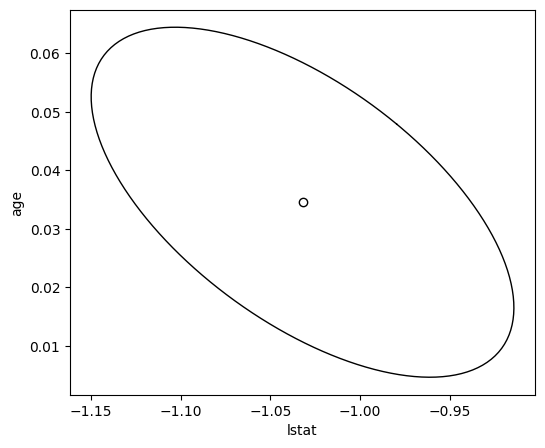

In [208]:
from scipy.stats import chi2
from matplotlib.axes import Axes
from matplotlib.figure import Figure


def ellipse(
    cov: pd.DataFrame,
    pos: pd.Series,
    which: tuple[str, str],
    alpha=0.95,
    npoints=300,
) -> tuple[Figure, Axes]:
    # Based on the R `ellipse` library implementation:
    # https://github.com/dmurdoch/ellipse/blob/master/R/ellipse.default.R

    xind, yind = which
    r = cov.loc[xind, yind]
    scale = np.sqrt([cov.loc[xind, xind], cov.loc[yind, yind]])

    if scale[0] > 0:
        r /= scale[0]
    if scale[1] > 0:
        r /= scale[1]

    t = np.sqrt(chi2.ppf(alpha, 2))
    r = np.clip(r, -1, 1)
    d = np.arccos(r)
    a = np.linspace(0, 2 * np.pi, npoints)

    x = t * scale[0] * np.cos(a + d / 2) + pos.loc[xind]
    y = t * scale[1] * np.cos(a - d / 2) + pos.loc[yind]

    fig, ax = plt.subplots()
    ax.plot(x, y, c="k", lw=1.0)
    ax.scatter(pos[xind], pos[yind], c="w", edgecolors="k")
    ax.set_xlabel(xind)
    ax.set_ylabel(yind)

    return fig, ax


_ = ellipse(fit_la.cov_params(), fit_la.params, which=("lstat", "age"))

#### Porównanie wielu modeli na podstawie przykładowych statystyk

                  LSTAT  LSTAT + AGE      No AGE         ALL
R_squared      0.544146     0.551269    0.740641    0.740643
F_statistic  601.617871   308.969335  117.320145  108.076666
RSE            6.215760     6.173136    4.740496    4.745298


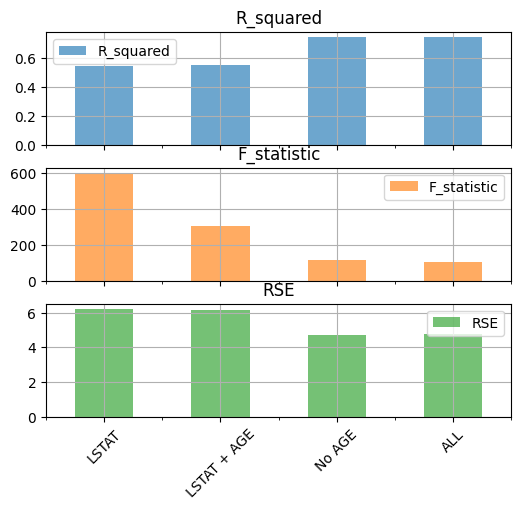

In [ ]:
def extract_stats(fit: RegressionResults) -> dict[str, float]:
    return {
        "R_squared": fit.rsquared,
        "F_statistic": fit.fvalue,
        "RSE": np.sqrt(fit.mse_resid),
    }


stats_summary = pd.DataFrame(
    {
        "LSTAT": extract_stats(fit_simple),
        "LSTAT + AGE": extract_stats(fit_la),
        "No AGE": extract_stats(fit_no_age),
        "ALL": extract_stats(fit_all),
    }
)

print(stats_summary)
stats_summary.T.plot.bar(rot=45, subplots=True, alpha=0.65, grid=True)
pass

#### Porównanie wielu modeli na podstawie testu ANOVA

In [193]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit_simple, fit_la, fit_no_age, fit_all)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,19168.128609,1.0,304.252810,13.511625,2.625737e-04
2,493.0,11078.846412,10.0,8089.282196,35.923858,1.309100e-52
3,492.0,11078.784578,1.0,0.061834,0.002746,9.582293e-01


## Nieliniowe transformacje predyktorów
- regresja wielomianowa wyższego stopnia
- regresja za pomocą wielomianów ortogonalnych
- logarytmiczna transformacja predyktora
- interakcje między zmiennymi

#### Regresja wielomianowa wyższego stopnia

In [194]:
fit_l2: RegressionResults
fit_l2 = smf.ols("medv ~ lstat + I(lstat**2)", data=boston).fit()
print(fit_l2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          1.56e-112
Time:                        01:17:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

#### Regresja za pomocą wielomianów ortogonalnych

In [ ]:
def poly(x: NDArray, deg: int, raw: bool = False) -> NDArray:
    V = np.vander(x, deg + 1, increasing=True)
    if raw:
        return V[:, 1:]
    Q, _ = np.linalg.qr(V)
    return Q[:, 1:]

In [196]:
fit_l5: RegressionResults
fit_l5 = smf.ols("medv ~ poly(lstat, 5)", data=boston).fit()
print(fit_l5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          8.73e-122
Time:                        01:17:48   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.5328      0.23

#### Logarytmiczna transformacja predyktora

In [197]:
print(smf.ols("medv ~ np.log(lstat)", data=boston).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          9.28e-122
Time:                        01:17:49   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

#### Interakcje między zmiennymi

In [198]:
print(smf.ols("medv ~ lstat * age", data=boston).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           4.86e-88
Time:                        01:17:49   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Predyktory jakościowe

- wczytanie nowego datasetu
- prosty model regresji ze zmienną kategoryczną
- podsumowanie modelu / pokazanie kodowania kategorii

#### Wczytanie nowego datasetu

In [199]:
carseats: pd.DataFrame
carseats = sm.datasets.get_rdataset("Carseats", package="ISLR").data
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#### Prosty model regresji ze zmienną kategoryczną

In [200]:
sales_all_ia_fit: RegressionResults
sales_all_ia_fit = smf.ols(f"Sales ~ {'+'.join(carseats.columns)} - Sales + Income:Advertising", data=carseats)
sales_all_ia_fit = sales_all_ia_fit.fit()

#### Podsumowanie modelu / pokazanie kodowania kategorii

In [201]:
print(sales_all_ia_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 23 Mar 2025   Prob (F-statistic):          5.48e-167
Time:                        01:17:51   Log-Likelihood:                -565.00
No. Observations:                 400   AIC:                             1156.
Df Residuals:                     387   BIC:                             1208.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.9300    

In [202]:
# ==================================================================
# Code has been generated by AI, then refined and verified manually
# ==================================================================
import patsy.contrasts

categories = carseats.loc[:, "ShelveLoc"].unique().tolist()
contrast_matrix = patsy.contrasts.Treatment().code_without_intercept(categories)
pd.DataFrame(
    contrast_matrix.matrix.astype(int),
    index=categories,
    columns=contrast_matrix.column_suffixes,
)

,[T.Good],[T.Medium]
Bad,0,0
Good,1,0
Medium,0,1
